In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from Attempt_5_multithreaded import *
import holoviews as hv
import numpy as np
from functools import partial
from holoviews.streams import Buffer, Stream, Pipe
import matplotlib.pyplot as plt

hv.extension('bokeh', logo=False)

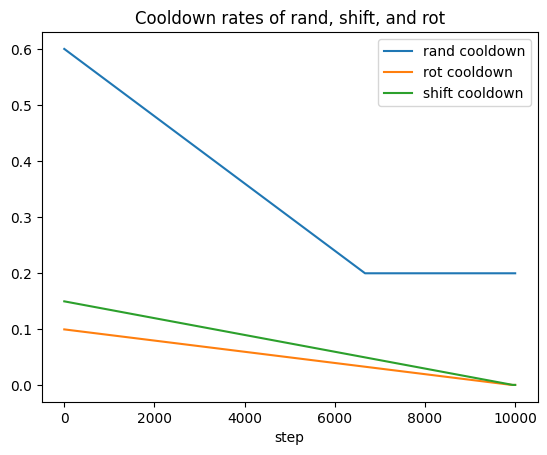

In [63]:
# Cooldown graph
x = np.array(range(1, max_steps if max_steps > 1 else 100_000))
# plt.plot(x, list(map(rand_func, x)), label='random cooldown')
plt.plot(x, rand_func(x), label='rand cooldown')
plt.plot(x, rot_func(x), label='rot cooldown')
plt.plot(x, shift_func(x), label='shift cooldown')
plt.legend()
plt.title('Cooldown rates of rand, shift, and rot')
plt.xlabel('step')
plt.show()
plt.close()

In [64]:
# Table code
rows = ['N', 'Episode', 'Step', 'Current Reward', 'Side Length', 'Wasted Area', 'Shift Rate', 'Rotation Rate', 'rand', 'Adjusted rand', 'ms/step']
table_pipe = Pipe({'stat':rows, 'value':[None]*len(rows)})
table = hv.DynamicMap(partial(hv.Table, kdims=['stat', 'value']), streams=[table_pipe]).opts(
    height=400,
)

In [65]:
# Graph code
# rand_buffer     = Buffer(np.zeros((0, 2)), length=buffer_size)
# rot_buffer      = Buffer(np.zeros((0, 2)), length=buffer_size)
# shift_buffer    = Buffer(np.zeros((0, 2)), length=buffer_size)
# reward_buffer   = Buffer(np.zeros((0, 2)), length=buffer_size)
side_len_buffer = Buffer(np.zeros((0, 2)), length=buffer_size)
# adj_rand_buffer = Buffer(np.zeros((0, 2)), length=buffer_size)
# overlap_buffer  = Buffer(np.zeros((0, 2)), length=buffer_size)
overlap_buffer  = None

side_len_buffer.following = False

graph = (
    hv.DynamicMap(partial(hv.Curve, vdims=['Side Length']), streams=[side_len_buffer]).relabel('Side Length').opts(ylim=(3.8, 7)) *
    hv.Curve(rand_func(x), vdims=['Cooldowns']).relabel('rand').opts(line_dash='dashed', ylim=(0, max_rand), alpha=max_rand) *
    hv.Curve(rot_func(x), vdims=['Cooldowns']).relabel('rot').opts(line_dash='dashed', ylim=(0, max_rand), alpha=max_rand) *
    hv.Curve(shift_func(x), vdims=['Cooldowns']).relabel('shift').opts(line_dash='dashed', ylim=(0, max_rand), alpha=max_rand)
    # hv.DynamicMap(partial(hv.Curve, vdims=['cooldown']), streams=[rand_buffer]).relabel('rand').opts(line_dash='dashed', ylim=(0, .5), alpha=.5) *
    # hv.DynamicMap(partial(hv.Curve, vdims=['cooldown']), streams=[rot_buffer]).relabel('rot').opts(line_dash='dashed', ylim=(0, .5), alpha=.5) *
    # hv.DynamicMap(partial(hv.Curve, vdims=['cooldown']), streams=[shift_buffer]).relabel('shift').opts(line_dash='dashed', ylim=(0, .5), alpha=.5) *
    # hv.DynamicMap(partial(hv.Curve, vdims=['cooldown']), streams=[adj_rand_buffer]).relabel('Adjusted rand').opts(line_dash='dotted', ylim=(0, .5)) *
    # hv.DynamicMap(partial(hv.Curve, vdims=['Reward']), streams=[reward_buffer]).relabel('Reward').opts(ylim=(-20, -3))
    # hv.DynamicMap(hv.Curve, streams=[side_len_buffer]).relabel('side_len')
    # hv.DynamicMap(partial(hv.Curve, vdims=['Side Length and Overlap']), streams=[overlap_buffer]).relabel('Overlap')
).opts(padding=0.1, width=1300, height=400, show_legend=True, show_grid=True, multi_y=True, xlabel='step', legend_position='bottom_right')

In [67]:
graph+table

BokehModel(combine_events=True, render_bundle={'docs_json': {'ded96b81-2f62-4099-9bbf-08a366cc653a': {'version…

In [68]:
# Fake data for testing the graph
# for cnt, i in enumerate(range(10)):
#     time.sleep(.1)
#     side_len_buffer.send(np.array([[cnt*100, np.random.randint(4, 7)]]))

Best side length yet:  4.502720454702273
Best Reward yet:  -4.502720454702273
Best State:
[2.95543490e+00 3.81113546e+00 9.30346521e-01 3.41254459e+00
 1.02149556e+00 1.57079633e+00 1.32868086e+00 3.41103668e+00
 1.29235952e+00 2.24779002e+00 1.32200610e+00 1.44753119e+00
 2.30580722e+00 2.59586389e+00 6.21454139e-01 4.25327796e+00
 2.15708479e+00 5.62971709e-01 4.26027927e+00 4.48480719e+00
 5.54145659e-03 4.12728887e+00 3.32487407e+00 3.83296184e-01
 4.68059384e+00 9.84674386e-01 2.15916688e-03 1.86956397e+00
 4.47967158e+00 1.57079633e+00 1.19056679e+00 1.97419152e+00
 1.55449390e+00]


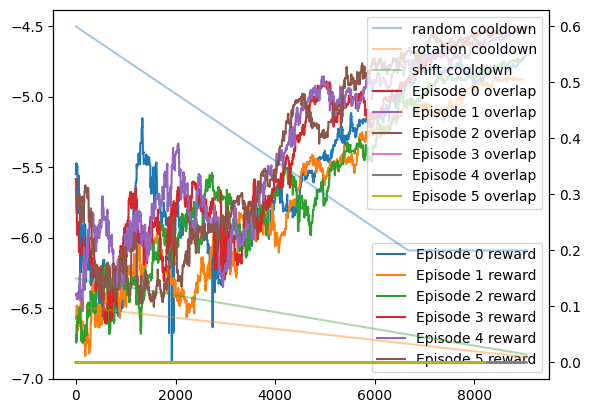

SystemExit: 0

/home/zeke/Software/miniconda3/envs/tf2/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [69]:
main(side_len_buffer, overlap_buffer, table_pipe, rows)